# GPS-Logger elemzo Peter Bence X89O8X

## Feladatok

1. Megadva egy v_max sebességhatárt, megállapítja, hány másodpercig volt a mozgás sebesség-nagysága ennél nagyobb.
2. Kiszámolja azt is, hogy mennyivel nőtt volna meg a menetidő, ha azonos útvonalon mennénk, de ahol átléptük v_max-ot, ott csak v_max-szal mentünk volna.

## Felhasznalt txt file-ok

* vezetes-1.txt
* vezetes-2.txt

In [208]:
from sympy import *
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [209]:
# numerikus derivalo fuggveny derivalas bal-, jobboldali es centralis kozelitessel
def deriv(xx_tab, ff_tab): # xx_tab ido tablazat, ff_tab f(t) tablazat
    N=xx_tab.shape[0]
    dff_dxx=np.zeros(N, np.float64)  # a deriváltak tömbje
    for i in range(N):
        if i==0:        # bal széle
            deriv=(ff_tab[1]-ff_tab[0])/(xx_tab[1]-xx_tab[0])
        elif i==N-1:    # jobb széle
            deriv=(ff_tab[N-1]-ff_tab[N-2])/(xx_tab[N-1]-xx_tab[N-2])
        else:          # közepe
            deriv=(ff_tab[i+1]-ff_tab[i-1])/(xx_tab[i+1]-xx_tab[i-1])
        dff_dxx[i]=deriv
    return(dff_dxx)

In [210]:
# numerikus integralo fuggveny, F0 kezdeti ertek
def integral(xx_tab, ff_tab, F0=0.0): # xx_tab ido tablazat, ff_tab f(t) tablazat, ks pedig a kozeliteshez hasznalt sema
    N=xx_tab.shape[0]
    Ff_tab=np.zeros(N, dtype=np.float64)
    Ff_tab=F0
    for i in range(1,N):
        intff[i]=intff[i-1]+(xx_tab[i]-xx_tab[i-1])*(ff_tab[i]+ff_tab[i-1])/2.0
    return(intff)

In [211]:
# Adatok beolvasasa es konvertalasa hasznalhato formatumba vezetes-1.txt bol
filename = 'vezetes-1.txt'
data = pd.read_csv(filename, header=0)
v_tab = data['speed(m/s)']
data['tdat'] = pd.to_datetime(data['date time'], format="%Y-%m-%d %H:%M:%S")
tdat_arr=data.tdat.to_numpy()
t_arr=(tdat_arr-tdat_arr[0])/np.timedelta64(1, 's') # ido datum adatok secundum-ma alakitasa
R_F=6378000.0 # a Föld sugara m-ben
long_arr=np.radians(data.longitude).to_numpy()  # hosszúsági adatok radiánba
lat_arr=np.radians(data.latitude).to_numpy()    # szélességi adatok radiánba
x_arr=(long_arr-long_arr[0])*np.cos(lat_arr[0])*R_F
y_arr=(lat_arr-lat_arr[0])*R_F

# Adatok beolvasasa es konvertalasa hasznalhato formatumba vezetes-1.txt bol
filename2 = 'vezetes-2.txt'
data2 = pd.read_csv(filename2, header=0)
v_tab2 = data2['speed(m/s)']
data2['tdat'] = pd.to_datetime(data2['date time'], format="%Y-%m-%d %H:%M:%S")
tdat_arr2=data2.tdat.to_numpy()
t_arr2=(tdat_arr2-tdat_arr2[0])/np.timedelta64(1, 's') # ido datum adatok secundum-ma alakitasa

In [212]:
# Néhány általános adat nyomtatása
print("Mérési pontok száma   : %d"%(len(t_arr)))

delta_t=t_arr[-1]-t_arr[0]
print("Időtartam             : %.2f s"%(delta_t))

delta_x=x_arr[-1]-x_arr[0]
delta_y=y_arr[-1]-y_arr[0]
print("Elmozdulás-komponensek: %.2f m, %.2f m"%(delta_x, delta_y))

delta_r_abs=(delta_x**2+delta_y**2)**0.5   # Pitagorasz-tétel
print("Elmozdulás nagysága   : %.2f m"%(delta_r_abs))
print("Átlagsebesség-komponensek: %.2f m/s, %.2f m/s"%(delta_x/delta_t, delta_y/delta_t))
print("Átlagsebesség nagysága   : %.2f m/s"%(delta_r_abs/delta_t))


Mérési pontok száma   : 1494
Időtartam             : 1493.00 s
Elmozdulás-komponensek: -2957.50 m, 4795.22 m
Elmozdulás nagysága   : 5633.92 m
Átlagsebesség-komponensek: -1.98 m/s, 3.21 m/s
Átlagsebesség nagysága   : 3.77 m/s


In [213]:
# sebesség-komponensek
vx_arr=deriv(t_arr, x_arr)
vy_arr=deriv(t_arr, y_arr)
# sebesség-nagyság:
vabs_arr=(vx_arr**2+vy_arr**2)**0.5

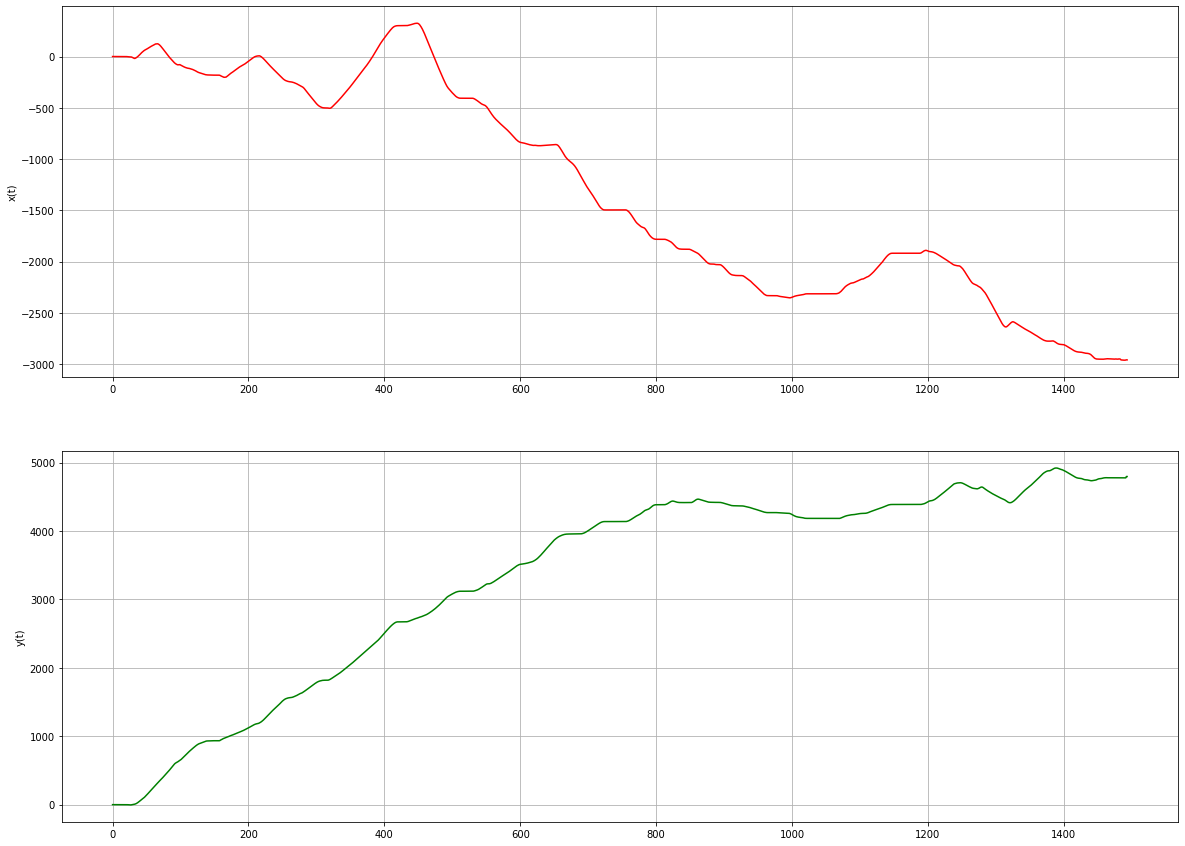

In [214]:
fig=plt.figure(figsize=(20,15))  # rajzméret
ax1=fig.add_subplot(211) # két rész-grafikon
ax2=fig.add_subplot(212)
ax1.set_ylabel("x(t)")
ax1.plot(t_arr, x_arr, color="red") # az elsőbe az x(t)
ax2.set_ylabel("y(t)")
ax2.plot(t_arr, y_arr, color="green") # a másodikba az y(t)
ax1.grid()
ax2.grid()

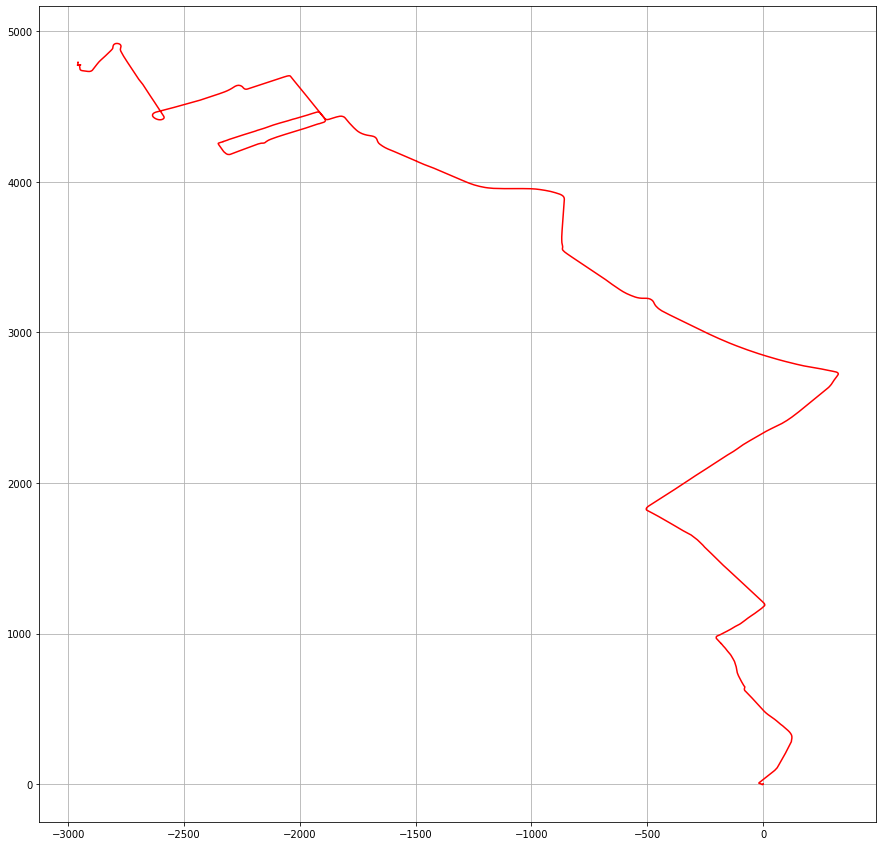

In [215]:
fig=plt.figure(figsize=(15,15))  # rajzméret
ax1=fig.add_subplot(111) 
ax1.plot(x_arr, y_arr, color="red") # x függvényében y
ax1.grid()

In [216]:
# út számítás
ut_arr=np.zeros(t_arr.shape, np.float64)
for i in range(1,len(ut_arr)):
    delta_x=x_arr[i]-x_arr[i-1]
    delta_y=y_arr[i]-y_arr[i-1]
    delta_ut=(delta_x**2+delta_y**2)**0.5
    ut_arr[i]=ut_arr[i-1]+ delta_ut

In [217]:
# teljes utat jellemző adatok:
print("Megtett út              : %.2f m"%(ut_arr[-1]))
print("Átlagos sebesség-nagyság: %0.2f m/s"%(ut_arr[-1]/t_arr[-1]))

Megtett út              : 9650.21 m
Átlagos sebesség-nagyság: 6.46 m/s


In [218]:
# néhány általános adat: (ismétlés)
print("Mérési pontok száma   : %d"%(len(t_arr)))
delta_t=t_arr[-1]-t_arr[0]
print("Időtartam             : %.2f s"%(delta_t))
delta_x=x_arr[-1]-x_arr[0]
delta_y=y_arr[-1]-y_arr[0]
print("Elmozdulás-komponensek: %.2f m, %.2f m"%(delta_x, delta_y))
delta_r_abs=(delta_x**2+delta_y**2)**0.5   # Pitagorasz-tétel
print("Elmozdulás nagysága   : %.2f m"%(delta_r_abs))
print("Átlagsebesség-komponensek: %.2f m/s, %.2f m/s"%(delta_x/delta_t, delta_y/delta_t))
print("Átlagsebesség nagysága   : %.2f m/s"%(delta_r_abs/delta_t))


Mérési pontok száma   : 1494
Időtartam             : 1493.00 s
Elmozdulás-komponensek: -2957.50 m, 4795.22 m
Elmozdulás nagysága   : 5633.92 m
Átlagsebesség-komponensek: -1.98 m/s, 3.21 m/s
Átlagsebesség nagysága   : 3.77 m/s


In [219]:
# Adatok simitasa
from scipy.signal import savgol_filter   # telepíteni kell a SciPy modult!

fokszam=5  # ennyied fokú csúszó polinom illesztés
ablak=21   # ennyi adatponttal (páratlan!)

xs_arr=savgol_filter(x_arr, ablak, fokszam)
ys_arr=savgol_filter(y_arr, ablak, fokszam)

In [220]:
# sebesség-komponensek
vxs_arr=deriv(t_arr, xs_arr)
vys_arr=deriv(t_arr, ys_arr)
# sebesség-nagyság:
vsabs_arr=(vxs_arr**2+vys_arr**2)**0.5

In [221]:
# gyorsulás-komponensek
axs_arr=deriv(t_arr, vxs_arr)
ays_arr=deriv(t_arr, vys_arr)
a_abs_arr=(axs_arr**2+ays_arr**2)**0.5

In [222]:
# sebesseg adatok simitasa
vxs_arr=savgol_filter(x_arr, ablak, fokszam, deriv=1)
vys_arr=savgol_filter(y_arr, ablak, fokszam, deriv=1)
# gyorsulas adatok simitasa
axs_arr=savgol_filter(x_arr, ablak, fokszam, deriv=2)
ays_arr=savgol_filter(y_arr, ablak, fokszam, deriv=2)
# sebesseg vektorok nagysaganak kiszamitasa x es y komponensekbol
vsabs_arr=(vxs_arr**2+vys_arr**2)**0.5
# gyorsulas vektorok nagysaganak kiszamitasa x es y komponensekbol
as_abs_arr=(axs_arr**2+ays_arr**2)**0.5

### 1. Feladat
#### Megadva egy v_max sebességhatárt, megállapítja, hány másodpercig volt a mozgás sebesség-nagysága ennél nagyobb.

In [223]:
def calc_time_over_vmax(v_max, v_arr, t_arr):
    v_max_ms = v_max / 3.6
    duration = 0.0
    for i in range(len(t_arr)):
        if v_arr[i] > v_max_ms:
            duration += t_arr[i]-t_arr[i-1]
    return duration

In [224]:
v_max = 50.0
time_over_vmax = calc_time_over_vmax(v_max, vsabs_arr, t_arr)
print("A sebesseg-nagysaga %.2f masodpercig volt nagyobb mint a v_max."%time_over_vmax)

A sebesseg-nagysaga 69.00 masodpercig volt nagyobb mint a v_max.


### 2. Feladat
#### Kiszámolja azt is, hogy mennyivel nőtt volna meg a menetidő, ha azonos útvonalon mennénk, de ahol átléptük v_max-ot, ott csak v_max-szal mentünk volna.

In [225]:
v_max_ms = v_max / 3.6 # km/h atvaltasa m/s-ba
v_legal_arr = np.where(vsabs_arr < v_max_ms, vsabs_arr, v_max_ms) # v_max nal nagyobb sebessegek kicserelese v_max-ra

In [226]:
# v = s / t
# t = r / v
v_atlag = np.sum(v_legal_arr) / len(v_legal_arr)
s = ut_arr[-1] - ut_arr[0]
t_legal = s / v_atlag
t_tobblet = t_legal - (t_arr[-1] - t_arr[0])
print("%.2f s-el none meg  az ido ha v_max ot nem lepjuk at."%t_tobblet)

24.33 s-el none meg  az ido ha v_max ot nem lepjuk at.
